<a href="https://colab.research.google.com/github/lucas-tebet/sigmoidal_data_science/blob/master/Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisando os dados do AirBnB em Lisboa

Todo mundo já conhece o [Airbnb](https://www.airbnb.com.br/) mas nem todos sabem que essa plataforma, além ter revolucionado o mercado hoteleiro, disponibiliza dados oficiais para que sejam analisados em tomadas de decisão mais precisas e consistentes. 

O Airbnb afirma fazer parte da "economia compartilhada" e atrapalha a indústria hoteleira. No entanto, os dados mostram que a maioria das listagens do Airbnb na maioria das cidades são casas inteiras, muitas das quais são alugadas o ano todo.

<center><img alt="Analisando dados do Airbnb" width=30% src="https://logodownload.org/wp-content/uploads/2016/10/Airbnb-Logo.png"></center>

**O objetivo deste *notebook* é analisar esses dados disponíveis e transformá-los em uma informação visual e interpretável.**

## Obtenção dos dados

Neste projeto, teremos uma primeira impressão com a programação em Pyhton e um contato mais próximo com o Data Science, aplicando dados reais para uma interpretação fidedigna e atualizada.

Todos os dados deste projeto foram retirados no site [Inside Airbnb](http://insideairbnb.com/index.html).

In [0]:
# importação pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
# importar o arquivo csv do Inside Airbnb para um Dataframe
df = pd.read_csv('http://data.insideairbnb.com/portugal/lisbon/lisbon/2020-04-29/visualisations/listings.csv')

In [5]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,6499,Belém 1 Bedroom Historical Apartment,14455,Bruno,Lisboa,Belm,38.69750,-9.19768,Entire home/apt,40,3,26,2020-01-03,0.38,1,307
1,25659,"Sunny, Alfama Sleeps 3 - Coeur d'Alfama",107347,Ellie,Lisboa,Santa Maria Maior,38.71167,-9.12696,Entire home/apt,60,3,113,2019-12-08,1.54,1,317
2,29248,Apartamento Alfama com vista para o rio!,125768,Bárbara,Lisboa,Santa Maria Maior,38.71272,-9.12628,Entire home/apt,60,3,321,2020-03-11,2.82,1,351
3,29396,Alfama Hill - Boutique apartment,126415,Mónica,Lisboa,Santa Maria Maior,38.71239,-9.12887,Entire home/apt,60,1,239,2020-03-15,2.47,2,318
4,29720,TheHOUSE - Your luxury home,128075,Francisco,Lisboa,Estrela,38.71195,-9.15877,Entire home/apt,1100,2,55,2020-03-15,0.48,2,300


## Análise dos dados

#### **Dicionário de variáveis**

* **id** = número do imóvel
* **name** = nome do imóvel
* **id_host** = número do anfitrião
* **name_host** = nome do anfitrião
* **neighborhood_group** = nome do agrupamento do bairro
* **neighborhood** = bairro
* **latitude** = latitude
* **longitude** = longitude
* **room_type** = tipo da acomodação
* **price** = preço 
* **minimum_nights** = número mínimo de noites
* **number_of_reviews**	= número de reviews
* **last_review**	= último review
* **reviews_per_month**	= média de reviews por mês
* **calculated_host_listings_count** = quantidade de imóveis do mesmo anfitrião
* **availability_365** = disponibilidade durante o ano


###Q1. Quantos atributos (variáveis) e entradas nossa Data Base possui? Quais os tipos das variáveis?

In [6]:
# identificar o volume de dados do Data Frame
print('Entradas:\t {}'.format(df.shape[0]))
print('Atributos:\t {}'.format(df.shape[1]))

# Tipos de variáveis
display(df.dtypes)

Entradas:	 24640
Atributos:	 16


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

###Q2. Qual a porcentagem de valores ausentes no *dataset*?
A qualidade da análise está relacionada a quantidade de células vazias no *dataset*. Quanto menor for esses valores, melhor será o resultado. Também, será importante para definir se os valores nulos são significativos na análise.


In [7]:
#ordenar por ordem descrescente as variáveis com os valores austentes

(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)


reviews_per_month                 0.168547
last_review                       0.168547
name                              0.000771
host_name                         0.000041
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

Algumas observações extraídas dos dados acima:
* somente 4 variáveis possuem células vazias
* 17% dos dados de **reviews por mês** são nulos
* 17% dos dados de **último review** são nulos
* < 1% dos dados do **nome do imóvel** são nulos
* < 1% dos dados do **nome do anfitrião** são nulos

###Q3. Qual o tipo de distribuição das variáveis?

As variáveis serão ilustradas por meio de histogramas.

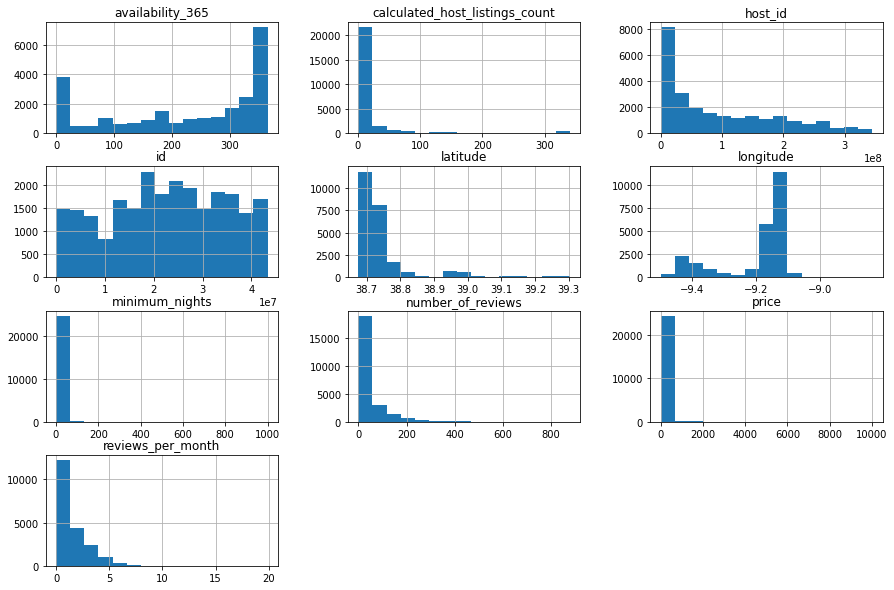

In [8]:
df.hist(bins=15, figsize=(15,10));

###Q4. Há *outliers* presentes?
Pela distribuição por histograma, é possível verificar a presença dos outliers nos atributos. 

Para confirmação, podemos há duas maneiras que auxiliam na identificação. São elas:
* Resumo estatístico por meio do método `describe[]`
* Plotar `bloxplots`para as variáveis

In [9]:
# ver o resumo estatístico dos atributos (variáveis)
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,24640.000000,24640.000000,24640.000000,20487.000000,24640.000000,24640.000000
mean,110.739732,3.294440,41.781291,1.459542,15.057224,225.239448
std,350.763230,15.970015,65.881125,1.461515,43.355842,132.790977
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,47.000000,1.000000,2.000000,0.320000,1.000000,118.000000
50%,69.000000,2.000000,14.000000,0.960000,3.000000,269.000000
75%,100.000000,3.000000,53.000000,2.210000,10.000000,349.000000
max,10000.000000,1000.000000,877.000000,19.890000,340.000000,365.000000


Olhando o resumo estatístico acima, podemos tirar algumas conclusões:
* a variável `price`possui 75% dos valores abaixo do valor de 100 EUR, porém tem o valor máximo de 10.000 EUR
* existe entrada com `minimum_nights`de 1.000 noites, o que não é coerente com o mercado 

####Boxplot para Minimum_nights

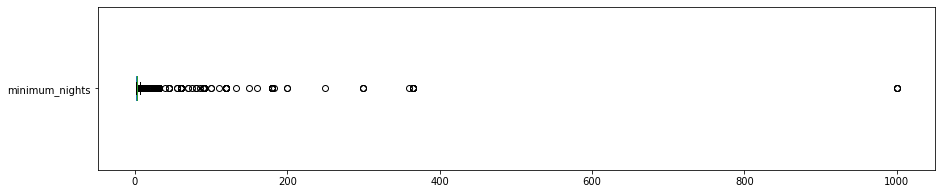

minimum_nights: valores acima de 30 noites
100 entradas
0.41%


In [13]:
#Boxsplot para minimum_nights

df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

#Ver a quantidade de valores com minimum_nights acima de 30 dias 
print('minimum_nights: valores acima de 30 noites')
print('{} entradas'.format(len(df[df.minimum_nights>30])))
print('{:.2f}%'.format((len(df[df.minimum_nights>30])/df.shape[0])*100))

####Boxplot para Price

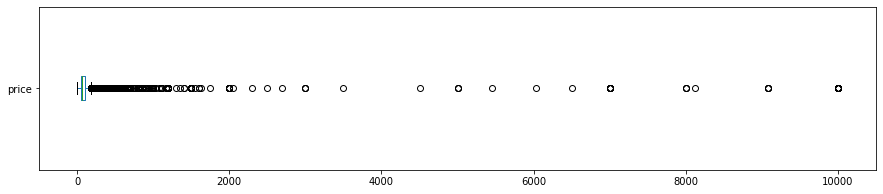

price: valores acima de 500 EUR
399 entradas
1.62%


In [14]:
#Boxsplot para price

df.price.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

#Ver a quantidade de valores com price acima de 500 
print('price: valores acima de 500 EUR')
print('{} entradas'.format(len(df[df.price>500])))
print('{:.2f}%'.format((len(df[df.price>500])/df.shape[0])*100))

####Histograma sem *outliers*
Já identificamos que existem outliers na nossa análise e agora iremos removê-los, para deixar os números de acordo com a realidade.

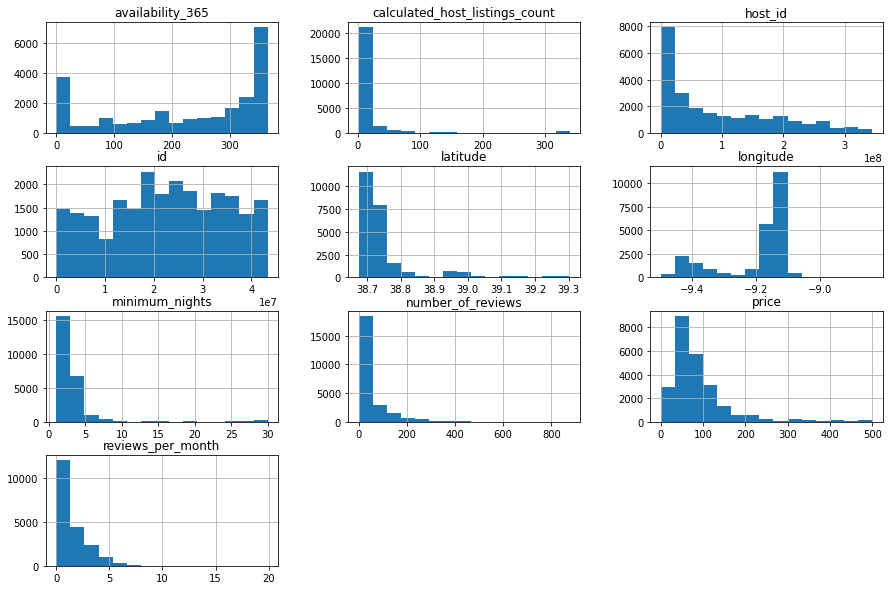

In [19]:
#remover os outliers em um novo dataframe
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price>500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights>30].index, axis=0, inplace=True)

#plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

###Q5. Qual é a correlação entre as variáveis?
A correlação das variáveis pode ser medida e portanto será criada uma matriz com um heatmap para ilustrar quais variáveis possuem uma maior correlação com outra.

In [20]:
#criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr()
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.018976,-0.122853,-0.119524,-0.014250,0.036701
minimum_nights,-0.018976,1.000000,-0.048353,-0.094098,-0.032050,-0.023519
number_of_reviews,-0.122853,-0.048353,1.000000,0.781687,-0.088279,0.082426
reviews_per_month,-0.119524,-0.094098,0.781687,1.000000,-0.098824,0.076849
calculated_host_listings_count,-0.014250,-0.032050,-0.088279,-0.098824,1.000000,0.046874
availability_365,0.036701,-0.023519,0.082426,0.076849,0.046874,1.000000


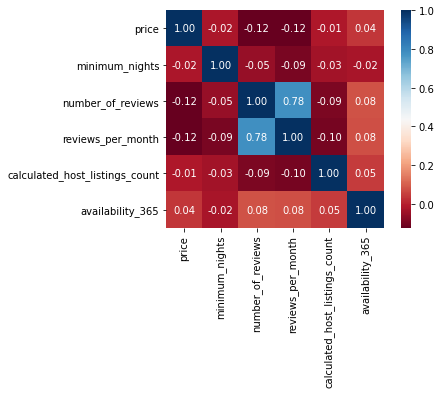

In [21]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

###Q6. Quais os tipos de imóveis mais alugados em Lisboa?

A variável `room_type`nos diz qual é o tipo de imóvel que está disponível na plataforma do Airbnb. Se você já entrou no Airbnb, já se deparou com a opção de imóveis inteiros ou simplesmente um quarto. Agora saberemos a contagem de cada tipo de imóvel.

In [32]:
print(df_clean.room_type.value_counts())

Entire home/apt    17609
Private room        5623
Hotel room           466
Shared room          443
Name: room_type, dtype: int64


In [45]:
print(df_clean.room_type.value_counts()/df_clean.shape[0])

Entire home/apt    0.729423
Private room       0.232923
Hotel room         0.019303
Shared room        0.018351
Name: room_type, dtype: float64


###Q7. Qual é a localização mais cara de Lisboa?
Nós conseguimos ter essa informação a partir do agrupamento das variáveis geolocalização, bairro e preço dos aluguéis.

In [47]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Vermelha                                           292.500000
Cardosas                                           280.000000
Aveiras de Baixo                                   269.500000
Ota                                                249.000000
Freiria                                            220.000000
Peral                                              174.800000
Vale do Paraso                                     150.000000
Enxara do Bispo, Gradil e Vila Franca do Rosrio    141.153846
Turcifal                                           138.200000
Carvoeira e Carmes                                 132.500000
Name: price, dtype: float64

Com esse resultado, percebemos que há bairros conhecidos que não estão listados acima, como Misericórdia, Santo Antônio, Alfama, Estrela ou Belém. Uma pessoa que não conhece a cidade um pouco melhor, pode ter uma impressão diferente da realidade. Portanto iremos dar uma olhada na quantidade de entradas dos bairros listados acima para ter uma melhor informação.  

In [51]:
#ver os imóveis no bairro Vermelha
df_clean[df_clean.neighbourhood == 'Vermelha']

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
5553,12451045,Sunny and Lovely Farm House/Pool,67363770,Solange,Cadaval,Vermelha,39.26844,-9.10864,Entire home/apt,235,5,19,2019-09-01,0.41,1,175
21031,36683641,Longer stays for families/Pets welcome/WIFI/Pool,275719003,Laura,Cadaval,Vermelha,39.27082,-9.10679,Entire home/apt,350,2,4,2019-09-22,0.45,1,302


In [49]:
#ver a quantidade de imóveis no bairro Vermelha
print(df_clean[df_clean.neighbourhood == 'Vermelha'].shape)

(2, 16)


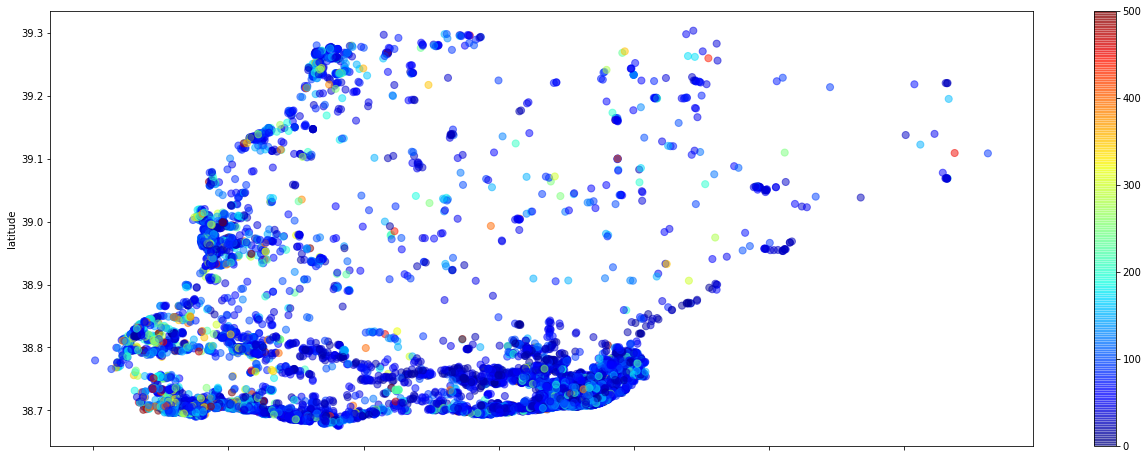

In [62]:
#plotar os imóveis com base em coordenadas
df_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.5, c=df_clean['price'], s=50, cmap=plt.get_cmap('jet'), figsize=(22,8));

##Conclusões
Foi feita uma análise superficial sobre a cidade de Lisboa, a partir dos dados fornecidos pelo próprio Airbnb. 
Verificamos que houve distorção dos dados, por conta dos outliers e quando foram removidos, foi dada uma informação muito mais coerente.
Este projeto foi feito com base em um arquivo com 16 variáveis, mas também há a possibilidade de termos uma análise muito mais profunda com arquivos .csv que possuem mais de 100 variáves, para alcançar um maior nível de detalhe. 